In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import statistics as stat

In [2]:
ab = pd.read_csv("iris.csv")
ab.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
ab.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
ab.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

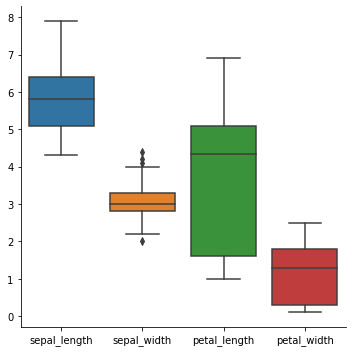

In [16]:
sns.catplot(data=ab,kind='box' )

In [18]:
iqr = ab['sepal_width'].quantile(0.75) - ab['sepal_width'].quantile(0.25) 
print('iqr = ',iqr)
up = ab['sepal_width'].quantile(0.75) + 1.5 * iqr
down = ab['sepal_width'].quantile(0.25) - 1.5 * iqr
print('up = {} , down = {}'.format(up,down))
sepalw = ab['sepal_width']

outlier = []
for i in sepalw:
    if i > up:
        print('outliner up ',i)
        outlier.append(i)

for i in sepalw:
    if i < down:
        print('outliner down ',i)
        outlier.append(i)

iqr =  0.5
up = 4.05 , down = 2.05
outliner up  4.4
outliner up  4.1
outliner up  4.2
outliner down  2.0


In [21]:
ab.sepal_width = ab.sepal_width.replace(outlier,ab.sepal_width.mean())

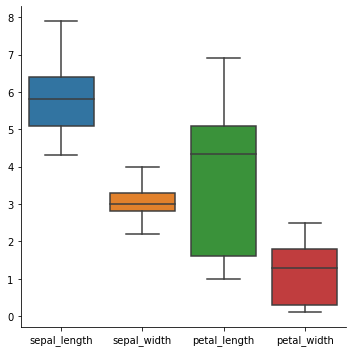

In [22]:
sns.catplot(data=ab,kind='box' )

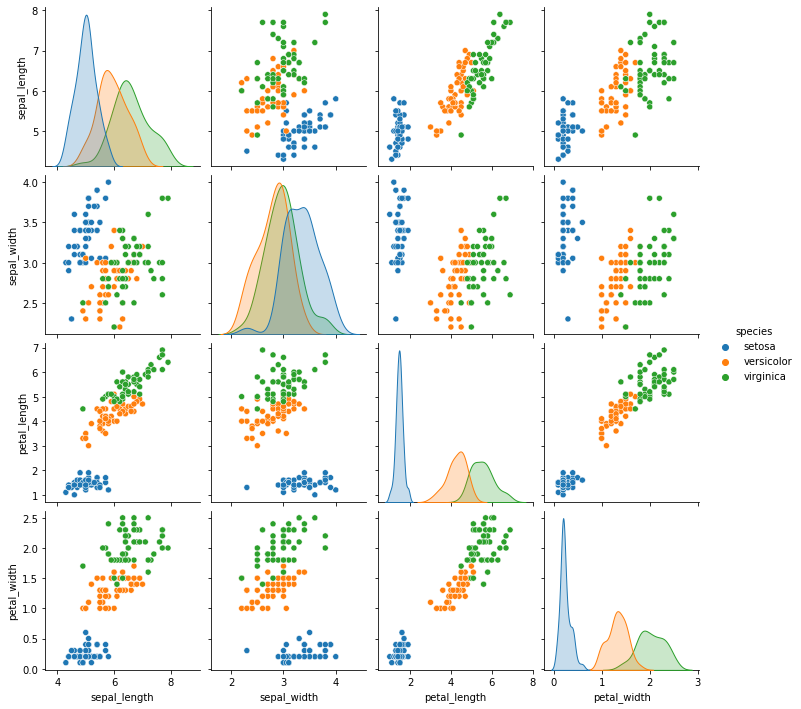

In [24]:
sns.pairplot(ab,hue='species')

In [25]:
ab.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [26]:
species = ab['species']
species[:2]

0    setosa
1    setosa
Name: species, dtype: object

In [27]:
data = ab.drop(['species'],axis = 1)
ab[:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [28]:
ab.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
ab.sepal_length = ab.sepal_length.replace(0,np.NaN)
ab.sepal_width = ab.sepal_width.replace(0,np.NaN)
ab.petal_length = ab.petal_length.replace(0,np.NaN)
ab.petal_width = ab.petal_width.replace(0,np.NaN)

In [30]:
ab.sepal_length = ab.sepal_length.fillna(data.sepal_length.mean())
ab.sepal_width = ab.sepal_width.fillna(data.sepal_width.mean())
ab.petal_length = ab.petal_length.fillna(data.petal_length.mean())
ab.petal_width = ab.petal_width.fillna(data.petal_width.mean())

In [31]:
ab.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
X = data
y = species

In [33]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Gaussian

In [35]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [36]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points :0


In [37]:
gnb.score(X,y)

0.96

In [38]:
#gnb.score(y_pred,y_test)
#y_pred
accuracy_score(y_test,y_pred)

1.0

### Multinomial


In [44]:
clf = MultinomialNB()
y_predm = clf.fit(X_train, y_train).predict(X_test)

In [45]:
#gnb.score(y_pred,y_test)
#y_pred
accuracy_score(y_test,y_pred)

1.0

In [46]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points :0


In [47]:
clf.score(X,y)

0.68

In [48]:
accuracy_score(y_test,y_pred)

1.0

### Binomial


In [49]:
clf2 = BernoulliNB()
y_predb = clf2.fit(X_train, y_train).predict(X_test)

In [50]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_predb).sum()))


Number of mislabeled points out of a total 45 points :34


In [51]:
clf2.score(X,y)

0.3333333333333333

In [52]:
accuracy_score(y_test,y_predb)

0.24444444444444444